In [15]:
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

data_list2019 = json.loads(open('fringe_2019.json').read())
fringe_2019 = pd.DataFrame(data_list2019)
data_list2018 = json.loads(open('fringe_2018.json').read())
fringe_2018 = pd.DataFrame(data_list2018)
data_list2017 = json.loads(open('fringe_2017.json').read())
fringe_2017 = pd.DataFrame(data_list2017)
data_list2016 = json.loads(open('fringe_2016.json').read())
fringe_2016 = pd.DataFrame(data_list2016)
data_list2015 = json.loads(open('fringe_2015.json').read())
fringe_2015 = pd.DataFrame(data_list2015)

# 2. Warnings：2015-2019

#### First, sort out the key words that appear in the warning column of the dataframe.
Because warnings are separated by commas, we separate them by commas and accumulate the number of times they occur，Then we show only the top 10 warnings
Finally，convert the table to CSV file for future project implementation

In [16]:
# Keywords in the warning column in 2016

# Clean data
# Some cells contain multiple keywords, separated by commas.
# Iterate through the cells, extract the keywords, and add them to the list.
fringe_2016=fringe_2016.where(fringe_2016.notnull(),'None')
A=fringe_2016['warnings'].values.tolist()
warnings_2016=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2016.append(value)

# Count the number of keywords.
result=pd.value_counts(warnings_2016)
result=result.rename_axis('warnings').reset_index(name='counts')

# Print the top ten warnings in 2016.
result2016=result[:11]
print(result2016)
result2016.to_csv('warning_2016.csv')


# Keywords in the warning column in 2015
fringe_2015=fringe_2015.where(fringe_2015.notnull(),'None')
A=fringe_2015['warnings'].values.tolist()
warnings_2015=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.capitalize()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.replace('gain priority','be given priority')
            d=d.replace('get priority','be given priority')
            d=d.replace('\r','')
            d=d.split(',')
            for value in d:
                warnings_2015.append(value)

result=pd.value_counts(warnings_2015)
result=result.rename_axis('warnings').reset_index(name='counts')
result2015=result[:11]
print('\n')
print(result2015)
result2015.to_csv('warning_2015.csv')


# Keywords in the warning column in 2017
fringe_2017=fringe_2017.where(fringe_2017.notnull(),'None')
A=fringe_2017['warnings'].values.tolist()
warnings_2017=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.capitalize()
        D=c.split(',')
        for d in D:
            d=d.replace('\r\n','')
            d=d.replace('late comers','latecomers')
            d=d.replace(' and','')
            d=d.replace('unreservedand','unreserved')
            d=d.replace('notbe','not be')
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2017.append(value)
                
result=pd.value_counts(warnings_2017)
result=result.rename_axis('warnings').reset_index(name='counts')
result2017=result[:11]
print('\n')
print(result2017)
result2017.to_csv('warning_2017.csv')

# Keywords in the warning column in 2019
fringe_2019=fringe_2019.where(fringe_2019.notnull(),'None')
A=fringe_2019['warnings'].values.tolist()
warnings_2019=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2019.append(value)

# Count the number of keywords.
result=pd.value_counts(warnings_2019)
result=result.rename_axis('warnings').reset_index(name='counts')

# Print the top ten warnings in 2019.
result2019=result[:11]
print(result2019)
result2019.to_csv('warning_2019.csv')

# Keywords in the warning column in 2018
fringe_2018=fringe_2018.where(fringe_2018.notnull(),'None')
A=fringe_2018['warnings'].values.tolist()
warnings_2018=[]

for a in A:
    C=a.split(',')
    for c in C:
        c=c.strip()
        c=c.replace('\n',',')
        D=c.split(',')
        for d in D:
            d=d.replace('.','')
            d=d.split(',')
            for value in d:
                warnings_2018.append(value)

# Count the number of keywords.
result=pd.value_counts(warnings_2018)
result=result.rename_axis('warnings').reset_index(name='counts')

# Print the top ten warnings in 2018.
result2018=result[:11]
print(result2018)
result2018.to_csv('warning_2018.csv')

                                             warnings  counts
0                                                None    2567
1   Buy a ticket in advance to guarantee entry or ...     118
2   You may be asked to show your Fringe Participa...      98
3   All seating is unreserved and latecomers may n...      83
4                                     Strong language      68
5                                     strong language      27
6                                        Adult themes      22
7                         May contain strong language      15
8                                       Adult content      15
9                      Loud music and flashing lights      14
10                       please visit bbccouk/tickets      13


                                             warnings  counts
0                                                None    2684
1   All seating is unreserved and latecomers may n...     151
2                                     Strong language      75
3   Bu

Second, plot to see the top ten most used warnings in three years

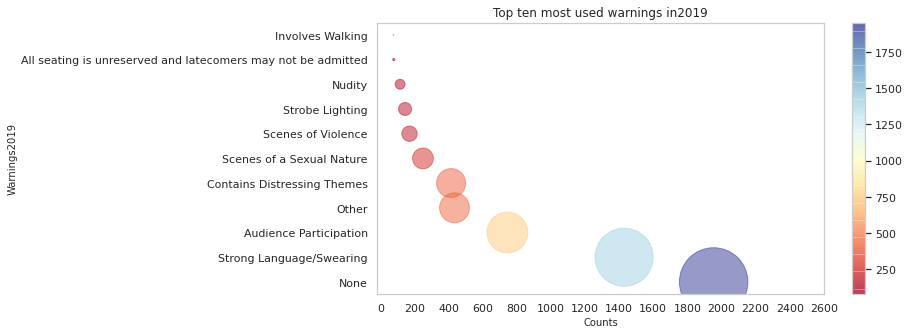

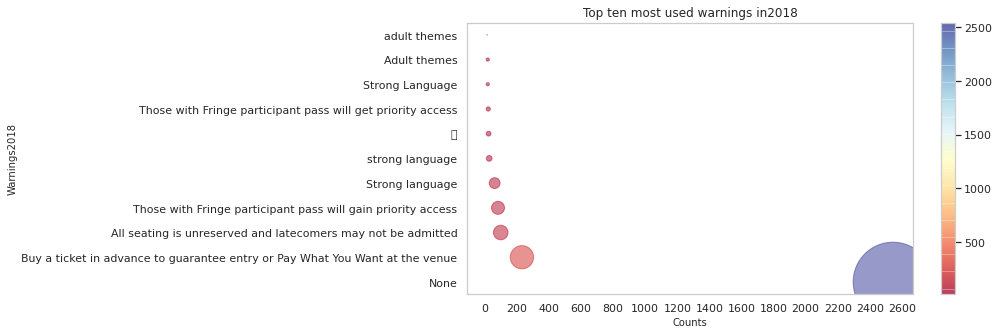

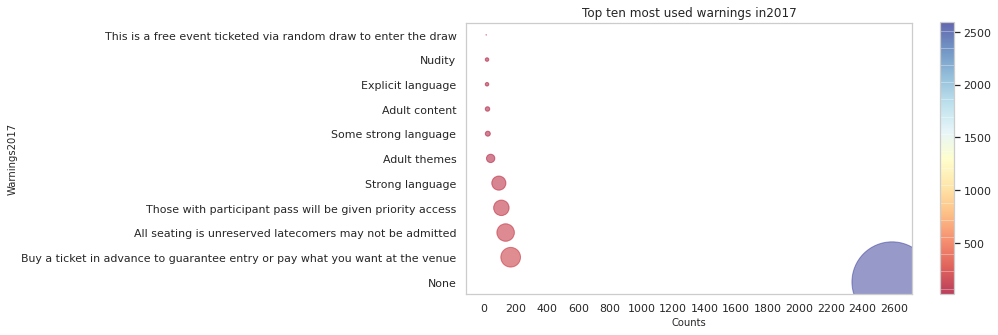

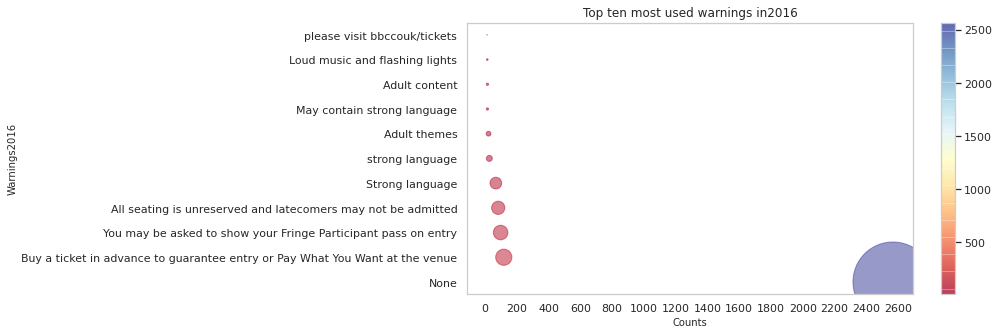

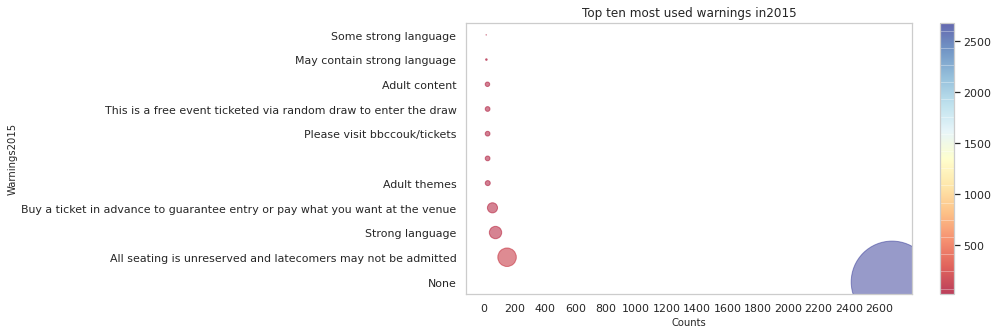

In [18]:
# The distribution of clusters in 2019 - 2015
# The dot size indicates the number of performances. The more shows, the bigger the dot.


def DrawBubble(df,year):
    sns.set(style = "whitegrid")
    x = df["counts"]
    y = df["warnings"]
    z = df["counts"]
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (10,5))
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) *2.5, c = z, cmap = cm, linewidth = 1, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
        
    ax.set_xlabel('Counts', fontsize = 10)
    ax.set_ylabel('Warnings'+year, fontsize = 10)
    x = range(0,2601,200)
    plt.xticks(x)
    plt.title('Top ten most used warnings in'+year)
    plt.show()
    

DrawBubble(result2019,'2019')
DrawBubble(result2018,'2018')
DrawBubble(result2017,'2017')
DrawBubble(result2016,'2016')
DrawBubble(result2015,'2015')
    
  

## Explanation

* Most performances come with no warning or a "none" label.
* Many warnings in 2017 and 2018 have to do with ticket sales, entry and seating arrangement ('All seating is unreserved latecomers may not be admitted.', 'Buy a ticket in advance to guarantee entry or pay what you want at the venue.', 'Those with participant pass will be given priority access.') In contrast, 2019 has seen a decrease in both the type and number of alerts.
* It is clear that performance alerts for 2019 are more specific than those for 2017 and 2018. In 2017 and 2018, "adult content" and "adult themes" frequently appeared in performance warnings, while in 2019 they were replaced by more detailed keywords, such as "scenes of sex natures" and "scenes of violence“." "strong language" for 2017 and 2018 were also replaced by "strong language/swearing" for 2019.
* The 2019 plan places more emphasis on user engagement than 2017 and 2018. In 2019, Audience Participation ranked third with more than 750, while "involved Walking" also made the top 10 with more than 70.


